In [7]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
model = ChatOpenAI()

In [5]:
# create a state

class LLMState(TypedDict):

    question: str
    answer: str

In [6]:
def llm_qa(state: LLMState) -> LLMState:

    # extract the question from state
    question = state['question']

    # form the prompt
    prompt = f'Answer the following question {question}'

    # ask that question to the LLM
    response = model.invoke(prompt).content

    # update the answer in the state
    state['answer'] = response

    return state

In [9]:
# create the graph

graph = StateGraph(LLMState)

# add nodes
graph.add_node('llm_qa', llm_qa)

# add edges
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# compile
workflow = graph.compile()

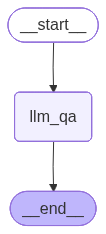

In [10]:
workflow

In [11]:
# execute

initial_state = {'question': 'How far is moon from the earth?'}
final_state = workflow.invoke(initial_state)
print(final_state)

{'question': 'How far is moon from the earth?', 'answer': 'The average distance between the Earth and the Moon is about 384,400 kilometers or 238,855 miles.'}
